In [2]:
import pandas as pd
import numpy as np
import math
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
data=pd.read_csv("C:/Users/NVRamanaRao/Desktop/rainfall in india 1901-2015.csv")
print("Data Heads")
print(data.head())

Data Heads
                 SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0  ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1  ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2  ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3  ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4  ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   

     JUL    AUG    SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  \
0  365.1  481.1  332.6  388.5  558.2   33.6  3373.2    136.3    560.3   
1  228.9  753.7  666.2  197.2  359.0  160.5  3520.7    159.8    458.3   
2  728.4  326.7  339.0  181.2  284.4  225.0  2957.4    156.7    236.1   
3  502.0  160.1  820.4  222.2  308.7   40.1  3079.6     24.1    506.9   
4  368.7  330.5  297.0  260.7   25.4  344.7  2566.7      1.3    309.7   

   Jun-Sep  Oct-Dec  
0   1696.3    980.3  
1   2185.9    716.7  
2   1874.0    6

In [4]:
print("Null values in the datasets before preprocessing")
print(data.isnull().sum())

Null values in the datasets before preprocessing
SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64


In [5]:
print("fillling null values with the mean of that particular column")
data=data.fillna(np.mean(data))
print("mean of data")
print(np.mean(data))
print("Null values in the dataset after programming")
print(data.isnull().sum())
print("\n\nShape",data.shape)

fillling null values with the mean of that particular column
mean of data
YEAR       1958.218659
JAN          18.957320
FEB          21.805325
MAR          27.359197
APR          43.127432
MAY          85.745417
JUN         230.234444
JUL         347.214334
AUG         290.263497
SEP         197.361922
OCT          95.507009
NOV          39.866163
DEC          18.870580
ANNUAL     1411.008900
Jan-Feb      40.747786
Mar-May     155.901753
Jun-Sep    1064.724769
Oct-Dec     154.100487
dtype: float64
Null values in the dataset after programming
SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64


Shape (4116, 19)


In [6]:
print("Info")
print(data.info())

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
SUBDIVISION    4116 non-null object
YEAR           4116 non-null int64
JAN            4116 non-null float64
FEB            4116 non-null float64
MAR            4116 non-null float64
APR            4116 non-null float64
MAY            4116 non-null float64
JUN            4116 non-null float64
JUL            4116 non-null float64
AUG            4116 non-null float64
SEP            4116 non-null float64
OCT            4116 non-null float64
NOV            4116 non-null float64
DEC            4116 non-null float64
ANNUAL         4116 non-null float64
Jan-Feb        4116 non-null float64
Mar-May        4116 non-null float64
Jun-Sep        4116 non-null float64
Oct-Dec        4116 non-null float64
dtypes: float64(17), int64(1), object(1)
memory usage: 611.0+ KB
None


In [7]:
print("Group By")
data.groupby('SUBDIVISION').size()

Group By


SUBDIVISION
ANDAMAN & NICOBAR ISLANDS             110
ARUNACHAL PRADESH                      97
ASSAM & MEGHALAYA                     115
BIHAR                                 115
CHHATTISGARH                          115
COASTAL ANDHRA PRADESH                115
COASTAL KARNATAKA                     115
EAST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
EAST UTTAR PRADESH                    115
GANGETIC WEST BENGAL                  115
GUJARAT REGION                        115
HARYANA DELHI & CHANDIGARH            115
HIMACHAL PRADESH                      115
JAMMU & KASHMIR                       115
JHARKHAND                             115
KERALA                                115
KONKAN & GOA                          115
LAKSHADWEEP                           114
MADHYA MAHARASHTRA                    115
MATATHWADA                            115
NAGA MANI MIZO TRIPURA                115
NORTH INTERIOR KARNATAKA              115
ORISSA                

In [8]:
print("Co-Variance",data.cov)
print("Co-relation",data.corr)

Co-Variance <bound method DataFrame.cov of                     SUBDIVISION  YEAR    JAN    FEB         MAR    APR    MAY  \
0     ANDAMAN & NICOBAR ISLANDS  1901   49.2   87.1   29.200000    2.3  528.8   
1     ANDAMAN & NICOBAR ISLANDS  1902    0.0  159.8   12.200000    0.0  446.1   
2     ANDAMAN & NICOBAR ISLANDS  1903   12.7  144.0    0.000000    1.0  235.1   
3     ANDAMAN & NICOBAR ISLANDS  1904    9.4   14.7    0.000000  202.4  304.5   
4     ANDAMAN & NICOBAR ISLANDS  1905    1.3    0.0    3.300000   26.9  279.5   
5     ANDAMAN & NICOBAR ISLANDS  1906   36.6    0.0    0.000000    0.0  556.1   
6     ANDAMAN & NICOBAR ISLANDS  1907  110.7    0.0  113.300000   21.6  616.3   
7     ANDAMAN & NICOBAR ISLANDS  1908   20.9   85.1    0.000000   29.0  562.0   
8     ANDAMAN & NICOBAR ISLANDS  1910   26.6   22.7  206.300000   89.3  224.5   
9     ANDAMAN & NICOBAR ISLANDS  1911    0.0    8.4    0.000000  122.5  327.3   
10    ANDAMAN & NICOBAR ISLANDS  1912  583.7    0.8    0.000000   

In [9]:
corr-cols=data.corr()['ANNUAL'].sort_values()[::-1]
print("Index of correlation columns",corr_cols.index)

SyntaxError: can't assign to operator (<ipython-input-9-2450811f1077>, line 1)

In [10]:
corr_cols=data.corr()['ANNUAL'].sort_values()[::-1]

In [11]:
print("Index of correlation columns",corr_cols.index)

Index of correlation columns Index(['ANNUAL', 'Jun-Sep', 'JUN', 'JUL', 'AUG', 'SEP', 'MAY', 'Mar-May',
       'OCT', 'APR', 'Oct-Dec', 'MAR', 'NOV', 'DEC', 'FEB', 'Jan-Feb', 'JAN',
       'YEAR'],
      dtype='object')


Scatter plot of annual andjanuary attributes


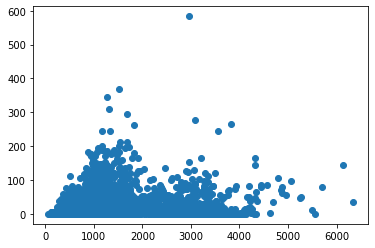

In [12]:
print("Scatter plot of annual andjanuary attributes")
plt.scatter(data.ANNUAL,data.JAN)

Dox Plot of annual rainfall data in yrs 1901-2015


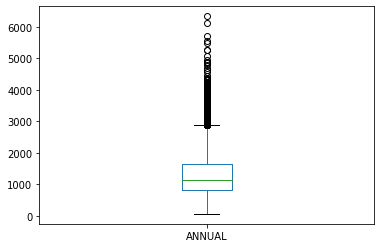

In [13]:
print("Dox Plot of annual rainfall data in yrs 1901-2015")
data['ANNUAL'].plot(kind='box',sharex=False,sharey=False)

Histogram showing the data from attributes( January to December) of the yrs 1901-2015


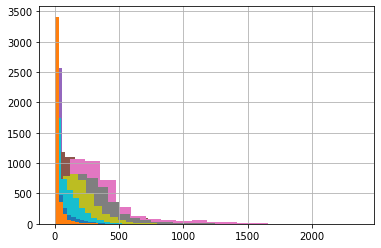

In [15]:
print("Histogram showing the data from attributes( January to December) of the yrs 1901-2015")
data['JAN'].hist(bins=20)
data['FEB'].hist(bins=20)
data['MAR'].hist(bins=20)
data['APR'].hist(bins=20)
data['MAY'].hist(bins=20)
data['JUN'].hist(bins=20)
data['JUL'].hist(bins=20)
data['AUG'].hist(bins=20)
data['SEP'].hist(bins=20)
data['OCT'].hist(bins=20)
data['NOV'].hist(bins=20)
data['DEC'].hist(bins=20)

Histogram showing the annual rainfall of the all states


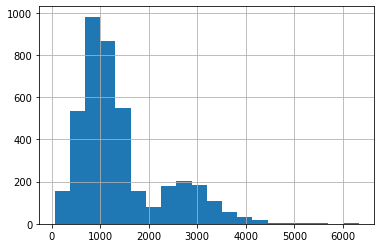

In [17]:
print("Histogram showing the annual rainfall of the all states")
data['ANNUAL'].hist(bins=20)

Violin plot of the ANNUAL attribute


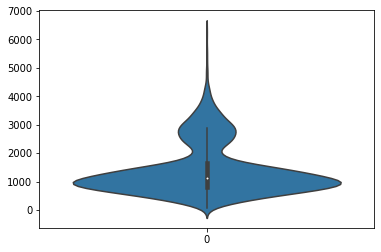

In [18]:
print("Violin plot of the ANNUAL attribute")
sb.violinplot(data=data['ANNUAL'])


Multiple linear regression model between annual rainfall and the periodic rainfall
Train X  shape (2881, 4) ; Test_x (1235, 4)
Train y  shape (2881,) ; Test_y (1235,)
[ 984.18433613 1400.46553121 1128.30089652 ... 1420.505693   1389.29188745
 1639.90548465]
Mean Squared Error  3326.4157535418785
Root Mean Squared Error 57.675087806971554
r2_score 0.9958637383726687


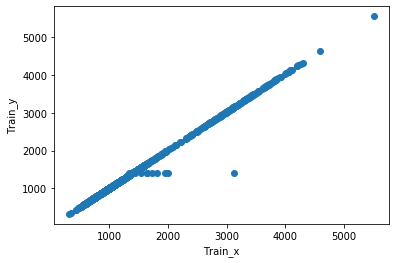

In [24]:
from sklearn import linear_model
print("Multiple linear regression model between annual rainfall and the periodic rainfall")
y=data['ANNUAL']
x=data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']]
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,shuffle=False)
print("Train X  shape",train_x.shape,"; Test_x",test_x.shape)
print("Train y  shape",train_y.shape,"; Test_y",test_y.shape)
lm=linear_model.LinearRegression()
lm.fit(train_x,train_y)
pred=lm.predict(test_x)
#print(pred)
print("Mean Squared Error ",mean_squared_error(test_y,pred))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(test_y,pred)))
print("r2_score",r2_score(test_y,pred))
plt.scatter(pred,test_y)
plt.xlabel('Train_x')
plt.ylabel('Train_y')
plt.show()
